<a href="https://colab.research.google.com/github/74obunga/DEEP-LEARNING/blob/main/RNN_SPATIAL_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/london_weather.csv')

In [ ]:
data

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [ ]:
# prompt: Using dataframe data: data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')


data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')


In [ ]:
data.fillna(data.mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['date']))


In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns.drop('date'))
data_scaled['date'] = data['date']

In [ ]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
seq_length = 30  # Sequence length for RNN
temperature_data = data_scaled['mean_temp'].values
X_rnn, y_rnn = create_sequences(temperature_data, seq_length)


In [ ]:
X_rnn = X_rnn.reshape((X_rnn.shape[0], X_rnn.shape[1], 1))


In [ ]:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)


In [ ]:
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

In [ ]:
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=20, validation_split=0.2)


Epoch 1/20
307/307 [==============================] - 3s 7ms/step - loss: 0.1440 - val_loss: 0.1214
Epoch 2/20
307/307 [==============================] - 2s 6ms/step - loss: 0.1133 - val_loss: 0.1173
Epoch 3/20
307/307 [==============================] - 2s 7ms/step - loss: 0.1135 - val_loss: 0.1175
Epoch 4/20
307/307 [==============================] - 3s 9ms/step - loss: 0.1129 - val_loss: 0.1174
Epoch 5/20
307/307 [==============================] - 2s 6ms/step - loss: 0.1130 - val_loss: 0.1178
Epoch 6/20
307/307 [==============================] - 2s 6ms/step - loss: 0.1123 - val_loss: 0.1176
Epoch 7/20
307/307 [==============================] - 2s 6ms/step - loss: 0.1127 - val_loss: 0.1168
Epoch 8/20
307/307 [==============================] - 2s 6ms/step - loss: 0.1118 - val_loss: 0.1161
Epoch 9/20
307/307 [==============================] - 2s 6ms/step - loss: 0.1127 - val_loss: 0.1179
Epoch 10/20
307/307 [==============================] - 3s 8ms/step - loss: 0.1118 - val_loss: 0.1224

In [ ]:
y_pred_rnn = model_rnn.predict(X_test_rnn)

96/96 [==============================] - 1s 4ms/step


Spatial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
X_spatial = data_scaled.drop(columns=['date', 'mean_temp']).values
y_spatial = data_scaled['mean_temp'].values

In [ ]:
X_train_spatial, X_test_spatial, y_train_spatial, y_test_spatial = train_test_split(X_spatial, y_spatial, test_size=0.2, random_state=42)


In [ ]:
model_spatial = LinearRegression()
model_spatial.fit(X_train_spatial, y_train_spatial)
model_spatial

LinearRegression()

In [ ]:
y_pred_spatial = model_spatial.predict(X_test_spatial)

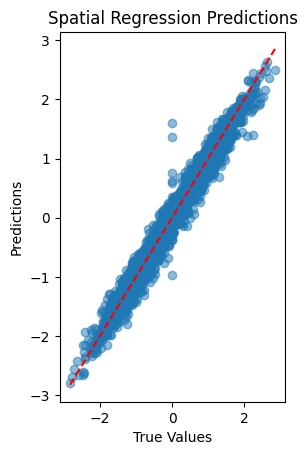

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test_spatial, y_pred_spatial, alpha=0.5)
plt.plot([min(y_test_spatial), max(y_test_spatial)], [min(y_test_spatial), max(y_test_spatial)], 'r--')
plt.title('Spatial Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

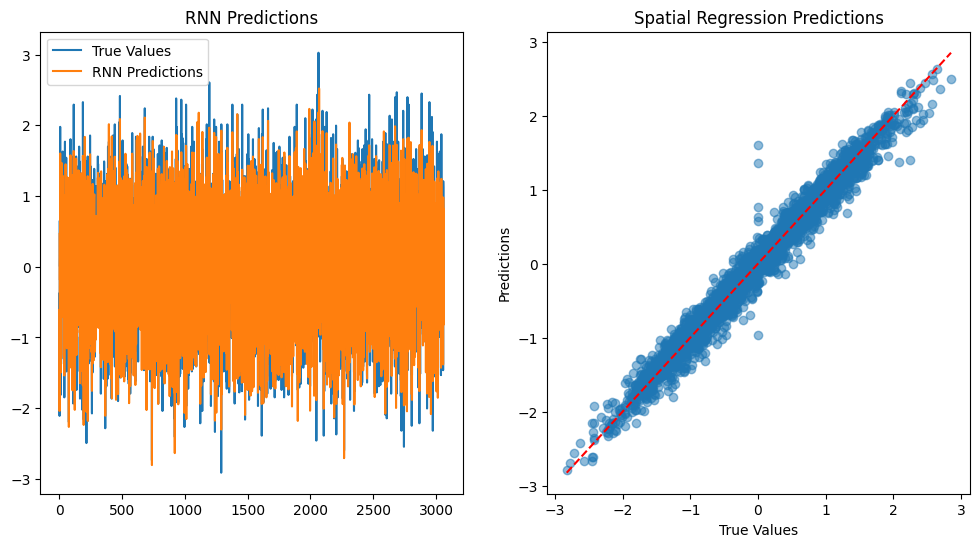

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_rnn, label='True Values')
plt.plot(y_pred_rnn, label='RNN Predictions')
plt.title('RNN Predictions')
plt.legend()

# Scatter plot for Spatial Regression predictions vs actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test_spatial, y_pred_spatial, alpha=0.5)
plt.plot([min(y_test_spatial), max(y_test_spatial)], [min(y_test_spatial), max(y_test_spatial)], 'r--')
plt.title('Spatial Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate RNN
rnn_mse = mean_squared_error(y_test_rnn, y_pred_rnn)
rnn_mae = mean_absolute_error(y_test_rnn, y_pred_rnn)
rnn_r2 = r2_score(y_test_rnn, y_pred_rnn)

print(f'RNN Mean Squared Error: {rnn_mse}')
print(f'RNN Mean Absolute Error: {rnn_mae}')
print(f'RNN R-squared: {rnn_r2}')


RNN Mean Squared Error: 0.10858785852579762
RNN Mean Absolute Error: 0.25943714241462335
RNN R-squared: 0.8875319808805231


In [ ]:
spatial_mse = mean_squared_error(y_test_spatial, y_pred_spatial)
spatial_mae = mean_absolute_error(y_test_spatial, y_pred_spatial)
spatial_r2 = r2_score(y_test_spatial, y_pred_spatial)

print(f'Spatial Regression Mean Squared Error: {spatial_mse}')
print(f'Spatial Regression Mean Absolute Error: {spatial_mae}')
print(f'Spatial Regression R-squared: {spatial_r2}')


Spatial Regression Mean Squared Error: 0.025654055674684272
Spatial Regression Mean Absolute Error: 0.12035549894043462
Spatial Regression R-squared: 0.9741848326877719


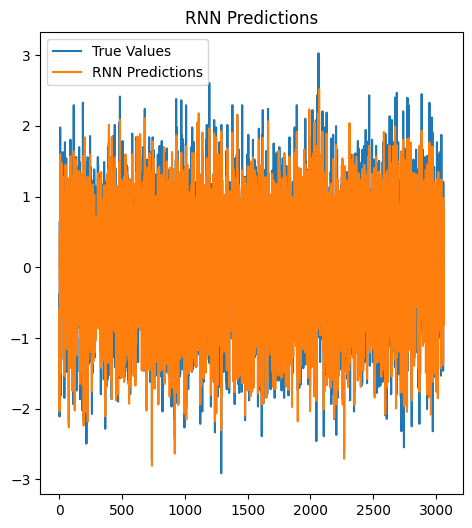

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_rnn, label='True Values')
plt.plot(y_pred_rnn, label='RNN Predictions')
plt.title('RNN Predictions')
plt.legend()

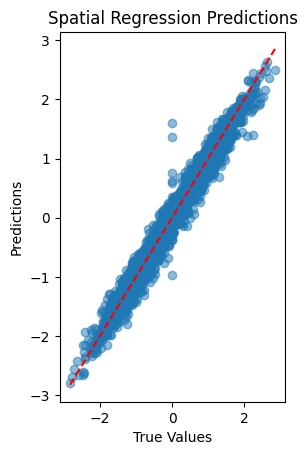

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test_spatial, y_pred_spatial, alpha=0.5)
plt.plot([min(y_test_spatial), max(y_test_spatial)], [min(y_test_spatial), max(y_test_spatial)], 'r--')
plt.title('Spatial Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [ ]:
rnn_results = pd.DataFrame({
    'True Values': y_test_rnn.flatten(),
    'Predicted Values': y_pred_rnn.flatten()
})

# Display the first few rows of the table
print("RNN True and Predicted Values:")
print(rnn_results.head(20))

RNN True and Predicted Values:
    True Values  Predicted Values
0     -0.380148         -0.612640
1     -2.110072         -2.040277
2      0.336285         -0.100175
3      0.650816          0.477268
4      0.004279         -0.187934
5      0.161545          0.463604
6      1.978839          1.602589
7     -1.149004         -0.941827
8     -1.096582         -0.554173
9      0.580920          0.478399
10    -1.813015         -1.496506
11     0.720712          0.692894
12     1.279880          1.203782
13     0.580920          0.478361
14    -1.306269         -1.290042
15     0.301337          0.718189
16     1.384724          1.010665
17     1.384724          1.468928
18     0.266389          0.501435
19    -0.345200         -0.272822


In [ ]:
spatial_results = pd.DataFrame({
    'True Values': y_test_spatial,
    'Predicted Values': y_pred_spatial
})

# Display the first few rows of the table
print("Spatial Regression True and Predicted Values:")
print(spatial_results.head(20))

Spatial Regression True and Predicted Values:
    True Values  Predicted Values
0      0.790608          0.750083
1      0.545973          0.737866
2      0.248915          0.316493
3      0.965348          0.708155
4      1.070192          1.296323
5      0.126597          0.240027
6     -0.362674         -0.287090
7     -0.450044         -0.369062
8      0.248915          0.261913
9     -0.904368         -0.794699
10     0.930400          0.729389
11     0.528499          0.477146
12    -0.956790         -0.904224
13    -1.306269         -1.313403
14    -0.624784         -0.398655
15     0.580920          0.647227
16     0.371233          0.399416
17    -0.677206         -0.817201
18     1.454619          0.976145
19    -0.450044         -0.431886


In [ ]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
seq_length = 30  # Sequence length for CNN
X_data = data_scaled.drop(columns=['date', 'mean_temp']).values
y_data = data_scaled['mean_temp'].values

X_cnn, y_cnn = create_sequences(X_data, seq_length)


In [ ]:
X_cnn = X_cnn.reshape((X_cnn.shape[0], X_cnn.shape[1], X_cnn.shape[2]))

# Train-Test Split
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, X_cnn.shape[2])),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mse')


In [ ]:
model_cnn.compile(optimizer='adam', loss='mse')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
307/307 [==============================] - 2s 4ms/step - loss: 0.9043 - val_loss: 0.8557
Epoch 2/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8808 - val_loss: 0.8523
Epoch 3/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8755 - val_loss: 0.8499
Epoch 4/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8715 - val_loss: 0.8496
Epoch 5/20
307/307 [==============================] - 1s 3ms/step - loss: 0.8702 - val_loss: 0.8470
Epoch 6/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8690 - val_loss: 0.8497
Epoch 7/20
307/307 [==============================] - 2s 5ms/step - loss: 0.8701 - val_loss: 0.8461
Epoch 8/20
307/307 [==============================] - 2s 6ms/step - loss: 0.8675 - val_loss: 0.8491
Epoch 9/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8675 - val_loss: 0.8531
Epoch 10/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8666 - val_loss: 0.8458

In [ ]:
y_pred_cnn = model_cnn.predict(X_test_cnn)


96/96 [==============================] - 0s 2ms/step


In [ ]:
y_pred_cnn = y_pred_cnn.flatten()

In [ ]:
cnn_mse = mean_squared_error(y_test_cnn, y_pred_cnn)
cnn_mae = mean_absolute_error(y_test_cnn, y_pred_cnn)
cnn_r2 = r2_score(y_test_cnn, y_pred_cnn)

print(f'CNN Mean Squared Error: {cnn_mse}')
print(f'CNN Mean Absolute Error: {cnn_mae}')
print(f'CNN R-squared: {cnn_r2}')

ValueError: y_true and y_pred have different number of output (8!=1)

In [ ]:
summary_table = pd.DataFrame({
    'Model': ['RNN', 'Spatial Regression'],
    'Mean Squared Error': [rnn_mse, spatial_mse],
    'Mean Absolute Error': [rnn_mae, spatial_mae],
    'R-squared': [rnn_r2, spatial_r2]
})

print("Model Comparison Summary:")
print(summary_table)

Model Comparison Summary:
                Model  Mean Squared Error  Mean Absolute Error  R-squared
0                 RNN            0.108588             0.259437   0.887532
1  Spatial Regression            0.025654             0.120355   0.974185


# New Section